In [158]:
import pandas as pd

In [159]:
df_carnaval = pd.read_excel('teste_rodrigo.xlsx')

In [160]:
df_carnaval.head()

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator
0,73719,2018-02-02 13:51:58.78,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,comecar,User
1,73722,2018-02-02 13:52:00.92,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"E ai Alan Pierre, o carnaval de BH já começou 🎉 🎭",Bot
2,73723,2018-02-02 13:52:03.90,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"Se você não sabe onde ir, posso te ajudar com ...",Bot
3,73726,2018-02-02 13:52:10.64,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,beber,User
4,73729,2018-02-02 13:52:12.07,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,🎵 Você pensa que cachaça é água?\nCachaça não ...,Bot


In [161]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


In [162]:
df_carnaval['StorageDate'] = pd.to_datetime(df_carnaval['StorageDate'])
df_carnaval['dia'] = df_carnaval['StorageDate'].dt.date
df_carnaval['hora'] = df_carnaval['StorageDate'].dt.time
df_carnaval['FromIdentity'] = df_carnaval['FromIdentity'].map(lambda x: x.rstrip('@messenger.gw.msging.net'))
df_carnaval.head()


,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,dia,hora
0,73719,2018-02-02 13:51:58.780,1454345038013757,carnabelo@msging.net,comecar,User,2018-02-02,13:51:58.780000
1,73722,2018-02-02 13:52:00.920,carnabelo,1454345038013757@messenger.gw.msging.net,"E ai Alan Pierre, o carnaval de BH já começou 🎉 🎭",Bot,2018-02-02,13:52:00.920000
2,73723,2018-02-02 13:52:03.900,carnabelo,1454345038013757@messenger.gw.msging.net,"Se você não sabe onde ir, posso te ajudar com ...",Bot,2018-02-02,13:52:03.900000
3,73726,2018-02-02 13:52:10.640,1454345038013757,carnabelo@msging.net,beber,User,2018-02-02,13:52:10.640000
4,73729,2018-02-02 13:52:12.070,carnabelo,1454345038013757@messenger.gw.msging.net,🎵 Você pensa que cachaça é água?\nCachaça não ...,Bot,2018-02-02,13:52:12.070000


In [163]:
df_carnaval['Day of Week'] = df_carnaval['StorageDate'].apply(lambda x: x.dayofweek)
diamap = {0:'seg',1:'ter',2:'qua',3:'qui',4:'sex',5:'sab',6:'dom'}
df_carnaval['Day of Week'] = df_carnaval['Day of Week'].map(diamap)

In [164]:
df_carnaval['hour'] = df_carnaval['hora'].apply(lambda x: x.hour)

Text(0, 0.5, 'Volume de mensagens')

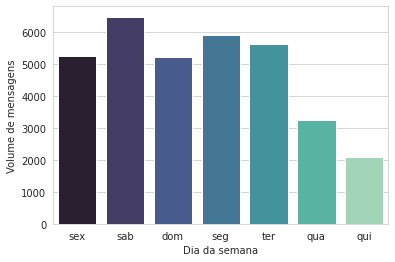

In [165]:
diadasemana = sns.countplot(x='Day of Week',data=df_carnaval,palette='mako')
diadasemana.set_xlabel('Dia da semana')
diadasemana.set_ylabel("Volume de mensagens")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


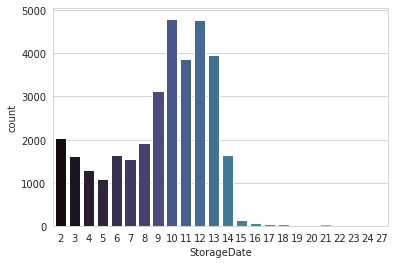

In [166]:
df_dia = df_carnaval['StorageDate'].dt.day
sns.countplot(df_dia,palette='mako')

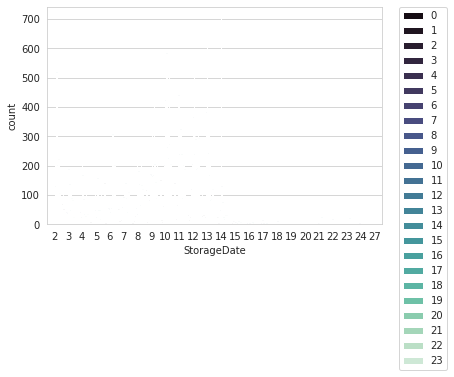

In [167]:
df_carnaval['Day'] = df_carnaval['StorageDate'].dt.day
sns.countplot(x=df_dia,hue =df_carnaval['hour'],palette='mako')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

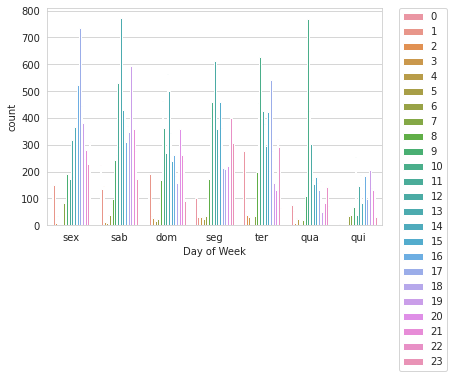

In [168]:
sns.countplot(x='Day of Week',data=df_carnaval,hue ='hour')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [169]:
diaHora = df_carnaval.groupby(by=['Day of Week','hour']).count()['Message'].unstack()
diaHora.head()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
dom,116.0,191.0,36.0,26.0,15.0,17.0,24.0,84.0,169.0,464.0,364.0,270.0,562.0,502.0,342.0,241.0,263.0,182.0,158.0,217.0,359.0,263.0,239.0,92.0
qua,75.0,52.0,10.0,26.0,25.0,3.0,10.0,18.0,56.0,110.0,770.0,426.0,304.0,167.0,154.0,181.0,158.0,131.0,166.0,48.0,47.0,84.0,143.0,71.0
qui,4.0,NaN,NaN,NaN,NaN,13.0,35.0,39.0,48.0,67.0,253.0,39.0,147.0,188.0,84.0,152.0,182.0,99.0,120.0,206.0,137.0,131.0,125.0,29.0
sab,225.0,135.0,145.0,13.0,10.0,39.0,40.0,80.0,97.0,243.0,262.0,531.0,291.0,772.0,431.0,400.0,310.0,369.0,347.0,594.0,324.0,360.0,278.0,174.0
seg,100.0,31.0,73.0,30.0,28.0,23.0,34.0,120.0,171.0,369.0,461.0,432.0,611.0,359.0,257.0,461.0,361.0,215.0,209.0,297.0,222.0,322.0,398.0,308.0


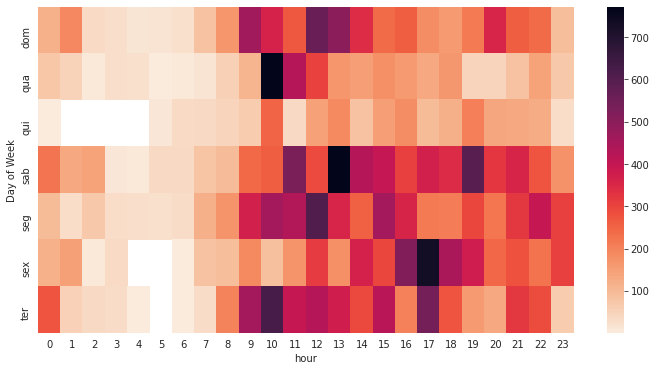

In [170]:
plt.figure(figsize=(12,6))
sns.heatmap(diaHora,cmap='rocket_r')

In [171]:
diaHora2 = df_carnaval.groupby(by=['Day','hour']).count()['Message'].unstack()
diaHora2.head()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,271.0,132.0,108.0,518.0,231.0,201.0,97.0,224.0,129.0,108.0
3,68.0,111.0,51.0,NaN,NaN,31.0,NaN,17.0,42.0,42.0,39.0,109.0,80.0,189.0,137.0,137.0,91.0,48.0,117.0,88.0,51.0,84.0,72.0,26.0
4,NaN,51.0,NaN,26.0,NaN,NaN,NaN,20.0,41.0,22.0,79.0,24.0,263.0,168.0,84.0,85.0,25.0,34.0,69.0,28.0,158.0,29.0,51.0,35.0
5,7.0,1.0,NaN,17.0,NaN,NaN,2.0,NaN,1.0,164.0,111.0,48.0,54.0,25.0,16.0,159.0,69.0,48.0,18.0,49.0,30.0,19.0,105.0,142.0
6,141.0,25.0,4.0,NaN,NaN,NaN,NaN,10.0,26.0,56.0,7.0,52.0,75.0,42.0,51.0,54.0,35.0,307.0,195.0,98.0,46.0,203.0,169.0,39.0


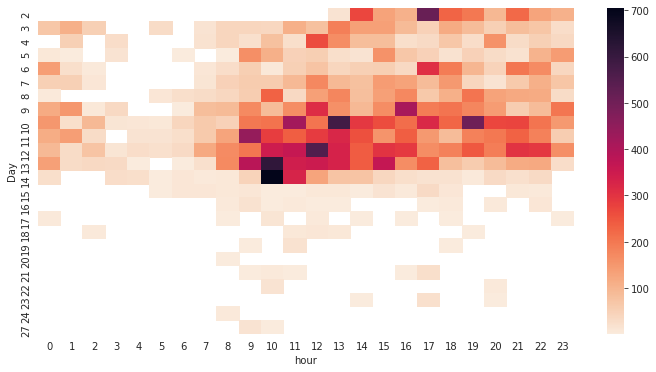

In [172]:
plt.figure(figsize=(12,6))
sns.heatmap(diaHora2,cmap='rocket_r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'hora')

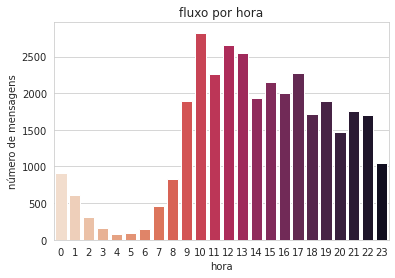

In [173]:
hora = sns.countplot(df_carnaval['hour'],palette='rocket_r')


hora.set_ylabel('número de mensagens')
hora.set_title('fluxo por hora')
hora.set_xlabel('hora')


In [174]:
df_usuario = df_carnaval[df_carnaval['MessageOriginator'].str.contains("User")]
df_bot = df_carnaval[df_carnaval['MessageOriginator'].str.contains("Bot")]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'mensagem'), Text(0, 0, 'propaganda')]

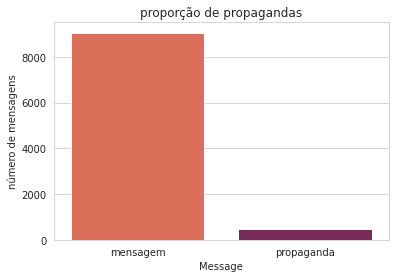

In [175]:
propagandas = sns.countplot(df_usuario['Message'].str.contains("ads-bot"),palette='rocket_r')


propagandas.set_ylabel('número de mensagens')
propagandas.set_title('proporção de propagandas')
propagandas.set_xticklabels( ('mensagem', 'propaganda',) )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'outras mensagens'), Text(0, 0, 'Confundiram')]

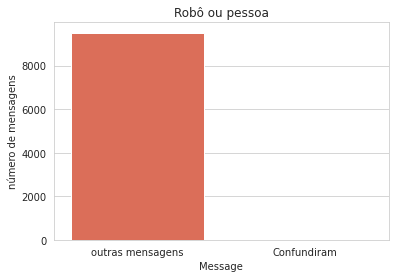

In [176]:
pessoa = sns.countplot(df_usuario['Message'].str.contains("quem"or'obrigada'or'pessoa'),palette='rocket_r')


pessoa.set_ylabel('número de mensagens')
pessoa.set_title('Robô ou pessoa')
pessoa.set_xticklabels( ('outras mensagens', 'Confundiram',) )

In [177]:
df_bot['Message'].value_counts().head(10)

Olha os blocos que encontrei para vc 👀                                                   1358
A cidade toda vai bombar!                                                                1351
 Em qual bloco vc vai? 👇                                                                 1136
Se você não sabe onde ir, posso te ajudar com isso.                                      1100
Tenho essas opções para te ajudar a encontrar um bloquinho de carnaval⬇\n                1024
 Dê uma olhada em alguns bairros que vão ter blocos.👇 \n                                  679
Diz aí... qual bairro você quer curtir os blocos?👇  \n                                    670
Bora tirar uma selfie?\nJunta a galera e me manda uma foto pra vc ver uma mágica  ✨ 📷     363
Não existe época melhor para dançar e se divertir com sua família e amigos.               335
Dá uma olhada no que encontrei para você 👀                                                323
Name: Message, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'mensagem'), Text(0, 0, 'agenda')]

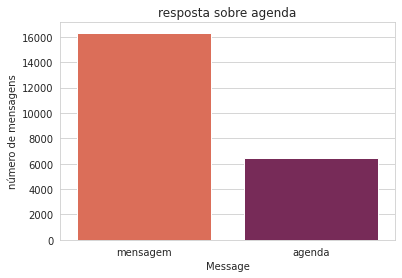

In [178]:
mensagens_bot = sns.countplot(df_bot['Message'].str.contains('bloco'or'bloquinho'or'agenda'or'aonde ir'or 'encontrei para'),palette='rocket_r')


mensagens_bot.set_ylabel('número de mensagens')
mensagens_bot.set_title('resposta sobre agenda')
mensagens_bot.set_xticklabels( ('mensagem', 'agenda',) )

In [179]:
df_contagem_mensagens = df_usuario['FromIdentity'].value_counts()


In [180]:
df_contagem_mensagens.head()


2132001316817479    550
1767958763279497    135
1775489765818948     81
1595484337207652     77
2111280855556324     76
Name: FromIdentity, dtype: int64

In [181]:
df_contagem_mensagens[df_contagem_mensagens==1].count()

53

In [182]:
df_contagem_mensagens[df_contagem_mensagens==2].count()

69

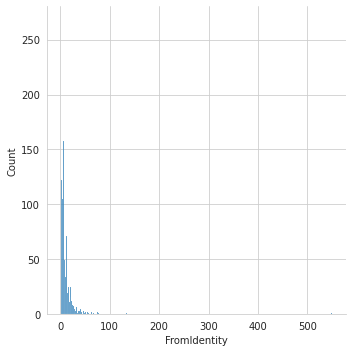

In [183]:
sns.displot(df_contagem_mensagens)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Quantidade de mensagens')

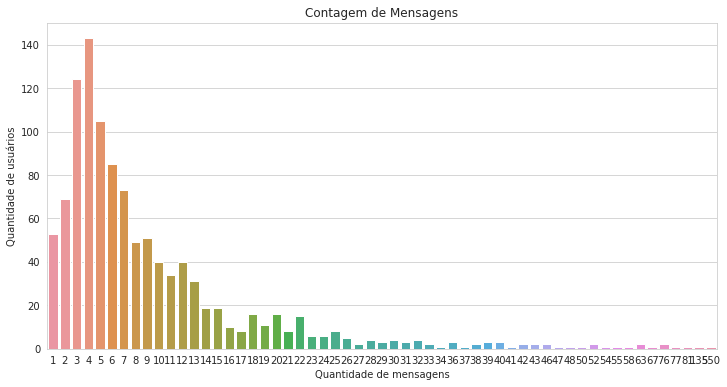

In [184]:
plt.figure(figsize=(12,6))
grafico_abaixo20 = sns.countplot(df_contagem_mensagens)
grafico_abaixo20.set_ylabel('Quantidade de usuários')
grafico_abaixo20.set_title('Contagem de Mensagens')
grafico_abaixo20.set_xlabel('Quantidade de mensagens')


In [185]:
df_contagem_mensagens.value_counts()

4      143
3      124
5      105
6       85
7       73
2       69
1       53
9       51
8       49
10      40
12      40
11      34
13      31
15      19
14      19
18      16
20      16
22      15
19      11
16      10
17       8
21       8
25       8
23       6
24       6
26       5
28       4
32       4
30       4
29       3
31       3
36       3
39       3
40       3
27       2
42       2
76       2
63       2
52       2
43       2
46       2
38       2
33       2
41       1
135      1
47       1
48       1
50       1
37       1
54       1
55       1
58       1
34       1
67       1
77       1
81       1
550      1
Name: FromIdentity, dtype: int64

In [186]:
df_contagem_mensagens.describe()

count    1103.000000
mean        9.992747
std        19.383791
min         1.000000
25%         4.000000
50%         6.000000
75%        12.000000
max       550.000000
Name: FromIdentity, dtype: float64

In [187]:
df_contagem_mensagens = df_contagem_mensagens.drop(df_contagem_mensagens[df_contagem_mensagens ==1].index)

In [188]:
df_contagem_mensagens.describe()

count    1050.000000
mean       10.446667
std        19.759119
min         2.000000
25%         4.000000
50%         6.000000
75%        12.000000
max       550.000000
Name: FromIdentity, dtype: float64

In [189]:
df_contagem_mensagens = df_contagem_mensagens.drop(df_contagem_mensagens[df_contagem_mensagens ==550].index)

In [190]:
df_contagem_mensagens.describe()

count    1049.000000
mean        9.932316
std        10.618209
min         2.000000
25%         4.000000
50%         6.000000
75%        12.000000
max       135.000000
Name: FromIdentity, dtype: float64

In [191]:
df_contagem_mensagens = df_contagem_mensagens.drop(df_contagem_mensagens[df_contagem_mensagens ==135].index)
df_contagem_mensagens.describe()

count    1048.000000
mean        9.812977
std         9.894445
min         2.000000
25%         4.000000
50%         6.000000
75%        12.000000
max        81.000000
Name: FromIdentity, dtype: float64

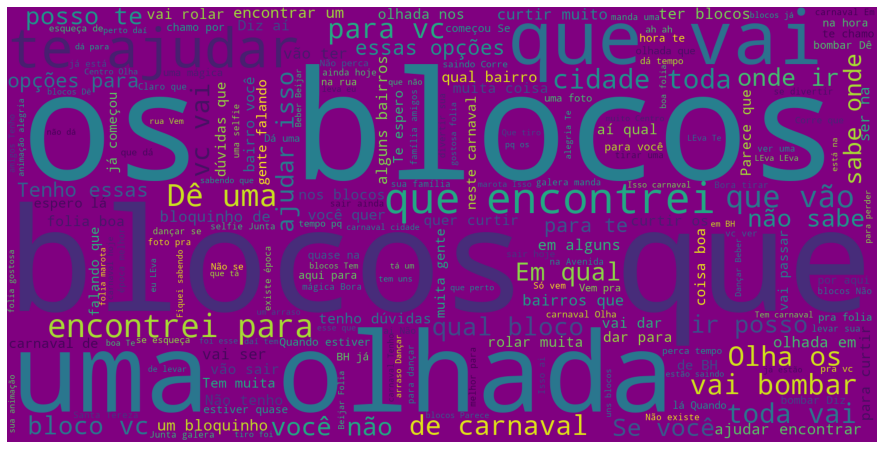

In [192]:
#importando as libraries necessárias para o wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

#montando um novo dicionário de stopwords
stopwords = set(STOPWORDS)

content = df_bot['Message'].apply(str)
all_content = "".join(c for c in content)



wordcloud = WordCloud(stopwords=stopwords,
                      background_color='purple', width=1600,                            
                      height=800).generate(all_content)


fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

In [193]:
df_eventos = pd.read_excel('eventos.xlsx')

In [194]:
df_eventos.head()


,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action
0,100,carnabelo@msging.net,2018-02-02 13:51:59.72 -02:00,Flow,Boas vindas
1,101,carnabelo@msging.net,2018-02-02 13:52:10.89 -02:00,Flow,Objetivo - Beber
2,102,carnabelo@msging.net,2018-02-02 13:52:10.98 -02:00,Objetivo,Beber
3,103,carnabelo@msging.net,2018-02-02 13:52:13.15 -02:00,Flow,Intro
4,104,carnabelo@msging.net,2018-02-02 13:52:17.34 -02:00,Flow,Menu


In [195]:
df_objetivos = df_eventos[df_eventos['Category']=='Objetivo']

Text(0.5, 0, 'Objetivo')

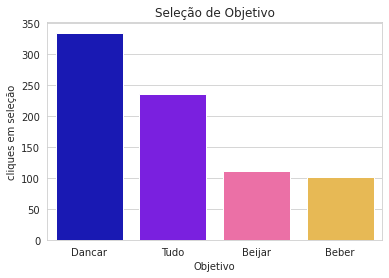

In [205]:
objetivo_ini = sns.countplot(x='Action',data=df_objetivos,palette='gnuplot2',order=df_objetivos['Action'].value_counts().index)
objetivo_ini.set_ylabel('cliques em seleção')
objetivo_ini.set_title('Seleção de Objetivo')
objetivo_ini.set_xlabel('Objetivo')

In [197]:
df_bairros = df_eventos[df_eventos['Category']=='Pesquisa - Bairro']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

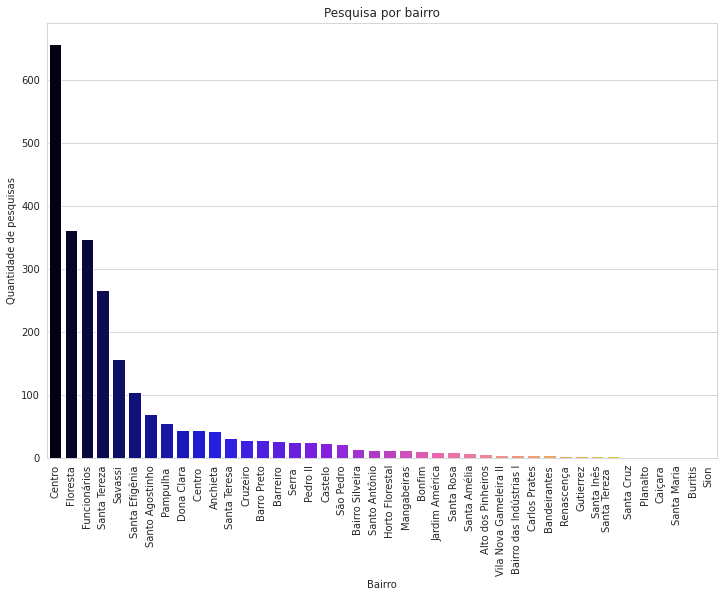

In [198]:
plt.figure(figsize=(12,8))
pesquisa_bairro = sns.countplot(x='Action',data=df_bairros,palette='gnuplot2',order=df_bairros['Action'].value_counts().index)
pesquisa_bairro.set_ylabel('Quantidade de pesquisas')
pesquisa_bairro.set_title('Pesquisa por bairro')
pesquisa_bairro.set_xlabel('Bairro')
plt.xticks(rotation=90)

In [199]:
df_eventos['Category'].value_counts()

Flow                         44727
Pesquisa - Bairro             2498
Pesquisa - Dia                1776
Eu vou                        1011
Como chegar                    843
Objetivo                       785
Ads                            384
broad-Pesquisa_Satisfacao      286
broad-Fim_Carnaval             182
Envio de foto                  128
broad-Cupom_Cabify             124
broad-Chama_Sindico             78
broad-chama-o-sindico           73
broad-                           5
Name: Category, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

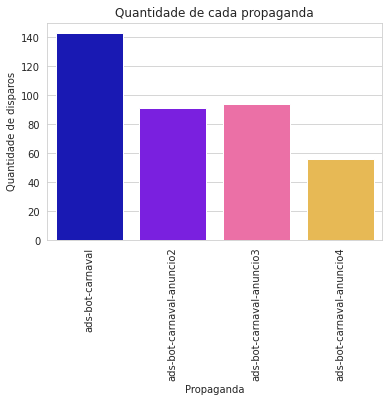

In [200]:
pesquisa_ads = sns.countplot(x='Action',data=df_Ads,palette='gnuplot2')
pesquisa_ads.set_ylabel('Quantidade de disparos')
pesquisa_ads.set_title('Quantidade de cada propaganda')
pesquisa_ads.set_xlabel('Propaganda')
plt.xticks(rotation=90)

In [201]:
df_API_plotado = df_eventos['Action'].dropna()


In [202]:
df_API_plotado

0                              Boas vindas
1                         Objetivo - Beber
2                                    Beber
3                                    Intro
4                                     Menu
                       ...                
52895    API  - Carrossel blocos  - Agenda
52896                           Santa Rosa
52897             Respostas para carrossel
52898                 Compartilhar - Intro
52899                  Compartilhar - Card
Name: Action, Length: 52900, dtype: object

In [203]:
API_plotado = sns.countplot(df_API_plotado[df_API_plotado.str.contains('API')],palette='rocket_r')


API_plotado.set_ylabel('quantidade de ocorrencias')
API_plotado.set_title('rodrigo lindo')
plt.xticks(rotation=90)

ValueError: ignored

In [ ]:
mensagens_bot = sns.countplot(df_eventos['Action'].str.contains("bloco"),palette='rocket_r')


mensagens_bot.set_ylabel('número de mensagens')
mensagens_bot.set_title('resposta sobre agenda')
mensagens_bot.set_xticklabels( ('mensagem', 'agenda',) )